In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv
/kaggle/input/students-grading-dataset/metadata.xlsx
/kaggle/input/students-grading-dataset/Students_Grading_Dataset.json


# About Dataset 


## Student Performance & Behavior Dataset

This dataset contains academic records of 5,000 students, including personal details, academic performance, and lifestyle habits. It consists of 22 columns covering aspects such as attendance, grades, study hours, extracurricular activities, and family background.

Key Information:

Demographic details: Gender, Age, Department.

Academic performance: Attendance (%), Midterm Score, Final Score, Assignments, Total Score, and Grade.

Study habits & lifestyle: Study Hours per Week, Extracurricular Activities, Internet Access at Home.

Family background: Parent Education Level, Family Income Level.

Well-being indicators: Stress Level (1-10), Sleep Hours per Night.

The dataset includes some missing values, especially in Parent Education Level (1,794 missing values) and Attendance (%) (516 missing values). 

These gaps have been handled appropriately to ensure accurate analysis.

This dataset provides valuable insights into the factors influencing students' academic performance and can help in identifying trends and correlations between different aspects of student life and education.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the dataset

In [15]:
df = pd.read_csv('/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv')

# Show data

In [17]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


# Show the information about data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [19]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [21]:
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [22]:
df.shape

(5000, 23)

In [5]:
df.nunique()

Student_ID                    5000
First_Name                       8
Last_Name                        6
Email                         5000
Gender                           2
Age                              7
Department                       4
Attendance (%)                2980
Midterm_Score                 3409
Final_Score                   3371
Assignments_Avg               2993
Quizzes_Avg                   3173
Participation_Score            997
Projects_Score                3141
Total_Score                   3171
Grade                            5
Study_Hours_per_Week           251
Extracurricular_Activities       2
Internet_Access_at_Home          2
Parent_Education_Level           4
Family_Income_Level              3
Stress_Level (1-10)             10
Sleep_Hours_per_Night           51
dtype: int64

 # Handling Missing Values

## Using KNN  algorithm for numerical columns that check the top 5 rows similar to  every row has null and put the averge of 5 row in it 

In [23]:
from sklearn.impute import KNNImputer

numerical_cols = ['Attendance (%)', 'Assignments_Avg']

imputer = KNNImputer(n_neighbors=5, weights="distance", metric="nan_euclidean")


df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


## fill nulls in categorical column using mode 

In [24]:
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].mode()[0])

## Check nulls again

In [26]:
df.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

# Check duplicates

In [27]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

## Distribution of Numeric Columns using histogram

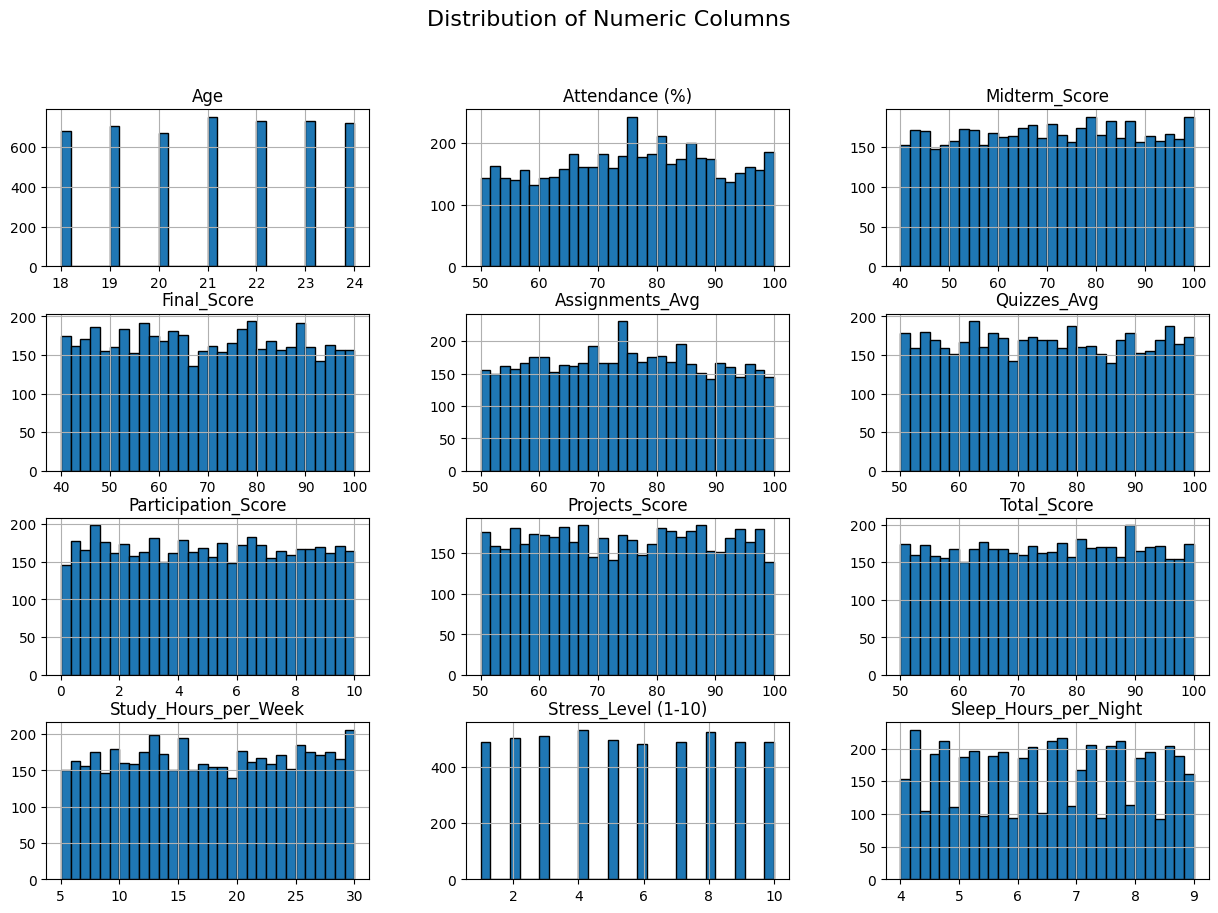

In [11]:
num_data = df.select_dtypes(include=['float64', 'int64']) 

num_data.hist(edgecolor='black',figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Numeric Columns", fontsize=16)
plt.show()

## Distribution of Numerical Features using Violin Plots

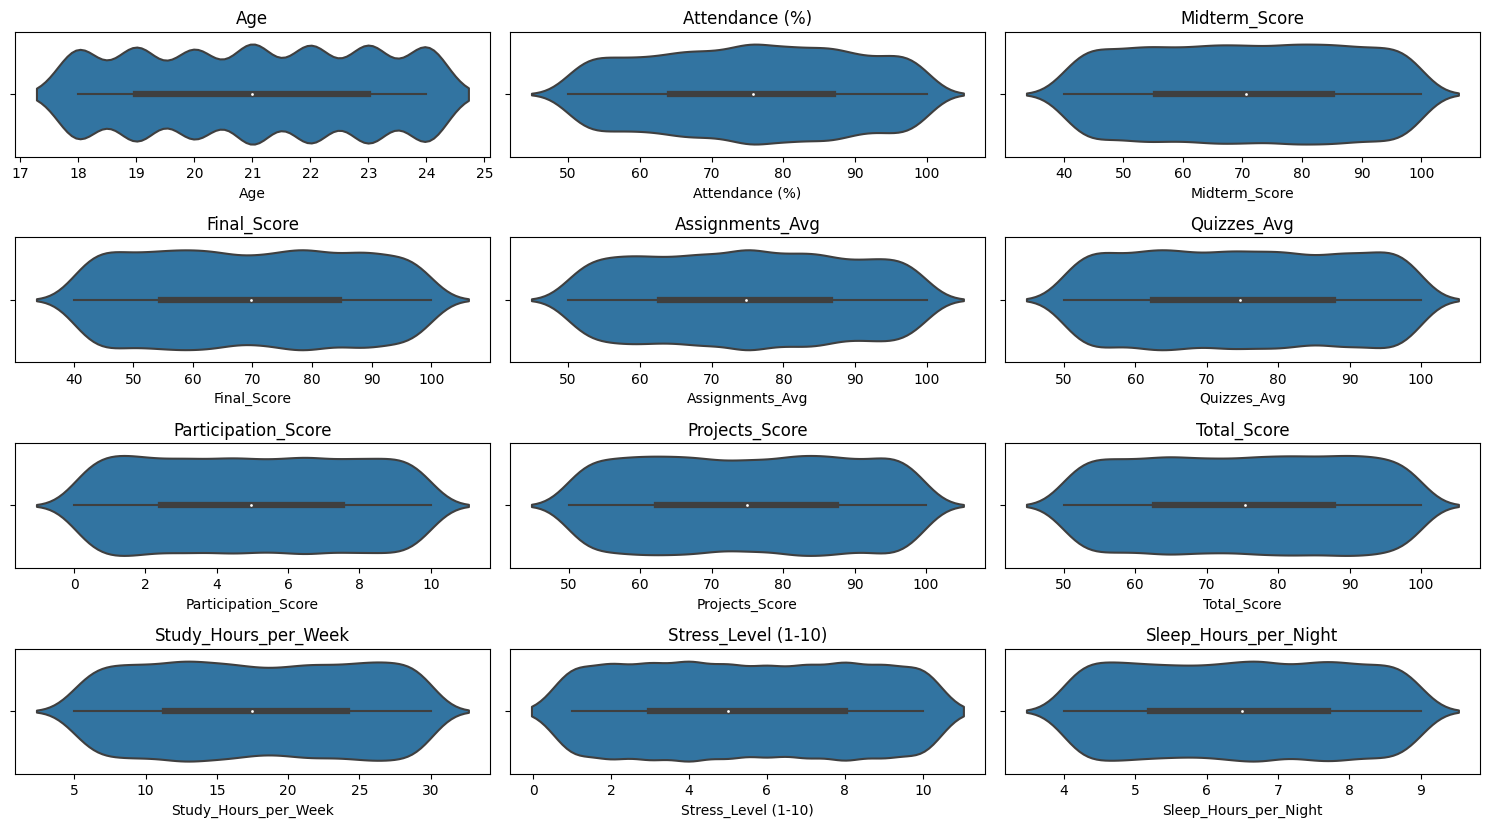

In [12]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_data.columns):
    plt.subplot(len(num_data.columns) // 3 + 1, 3, i + 1)
    sns.violinplot(x=num_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## Correlation between numerical features using heatmap

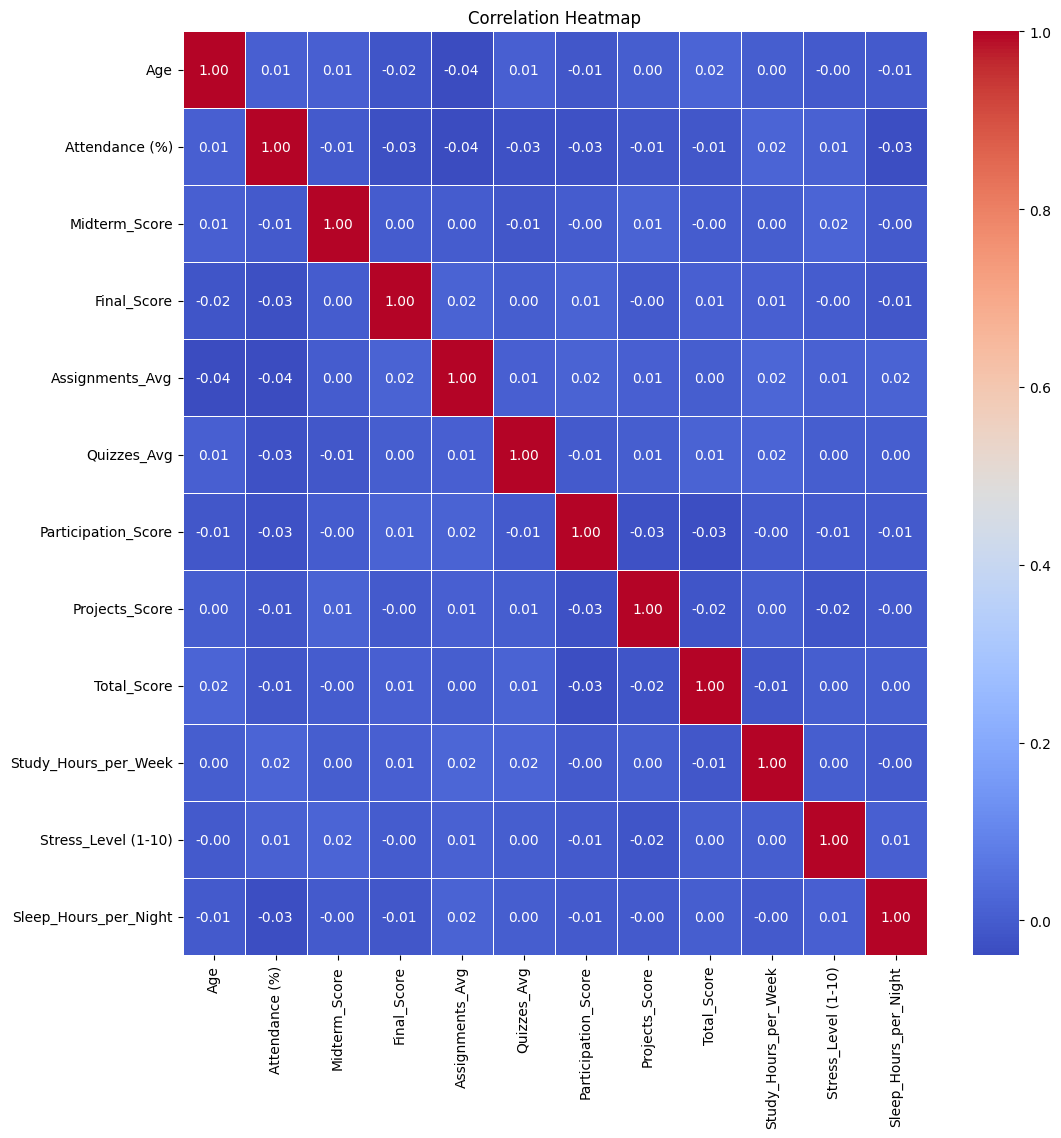

In [16]:
corr_matrix = num_data.corr()

plt.figure(figsize=(12, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

## Distribution of Grades

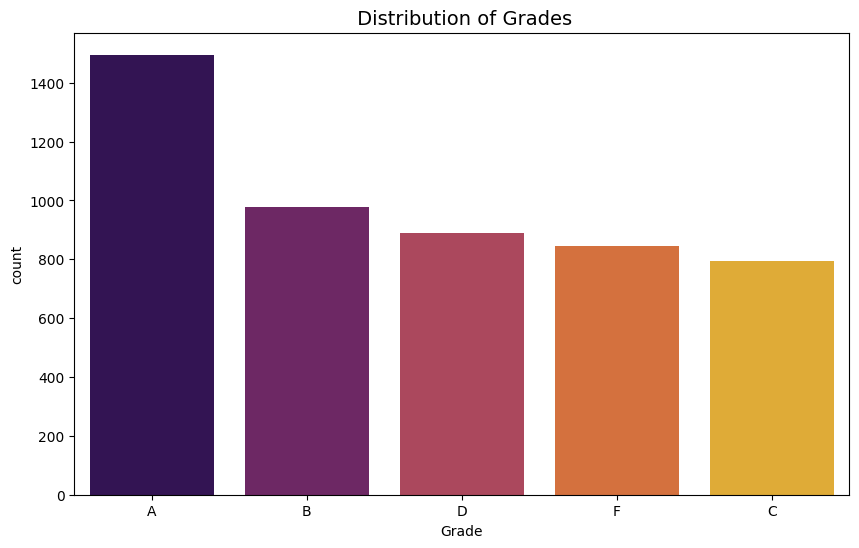

In [13]:
plt.figure(figsize=(10, 6))
grade_order = df['Grade'].value_counts().index  
sns.countplot(data=df,x='Grade', order=grade_order, palette="inferno")
plt.title(' Distribution of Grades', fontsize=14)
plt.show()

## Distribution of Departments

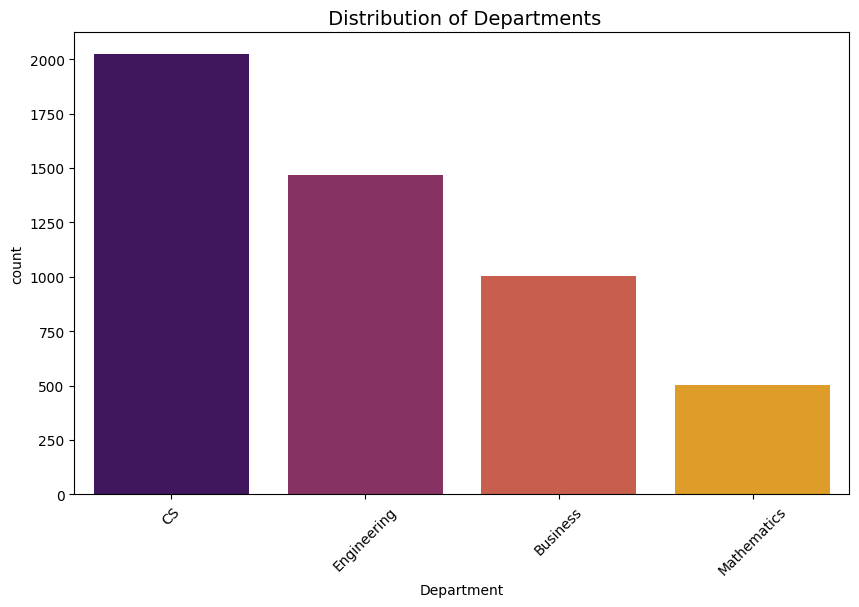

In [14]:
plt.figure(figsize=(10, 6))
dept_order = df['Department'].value_counts().index  
sns.countplot(data=df,x='Department', order=dept_order, palette="inferno")
plt.title(' Distribution of Departments', fontsize=14)
plt.xticks(rotation=45)  
plt.show()

## Gender Distribution

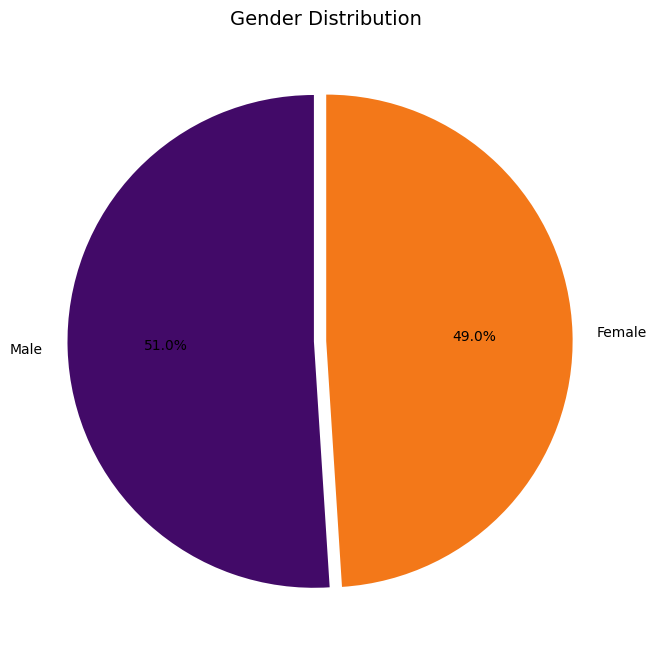

In [15]:
plt.figure(figsize=(8, 8))
colors = plt.cm.inferno([0.2, 0.7])  
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', colors=colors, startangle=90, explode=[0.05, 0])  
plt.title('Gender Distribution', fontsize=14)
plt.show()

# More insights about data 

## Relation between Total score & ( Department , Gender ) USING boxplot

Text(0.5, 1.0, 'Total Score by Department')

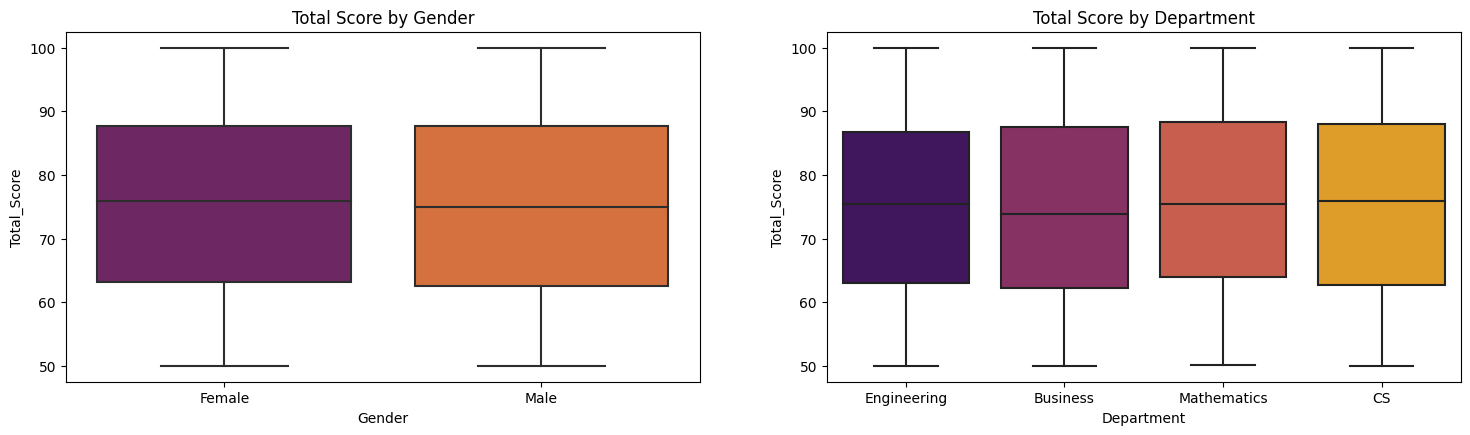

In [17]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Gender', y='Total_Score', palette="inferno")
plt.title("Total Score by Gender")

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Department', y='Total_Score', palette="inferno")
plt.title("Total Score by Department")

## Relation between Total score & ( Attendance , Study hours per week ) USING  scatterplot

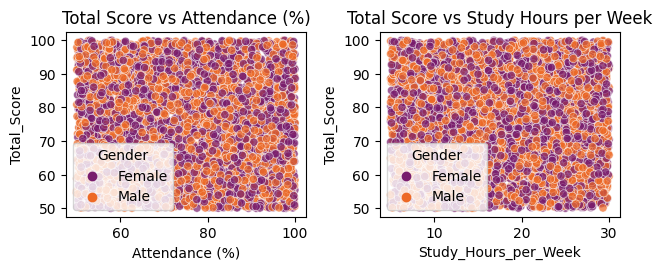

In [18]:
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Attendance (%)', y='Total_Score', hue='Gender', palette="inferno", alpha=0.7)
plt.title("Total Score vs Attendance (%)")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Study_Hours_per_Week', y='Total_Score', hue='Gender', palette="inferno", alpha=0.7)
plt.title("Total Score vs Study Hours per Week")

plt.tight_layout()
plt.show()

## Relationship between Department and Attendance USING  barplot

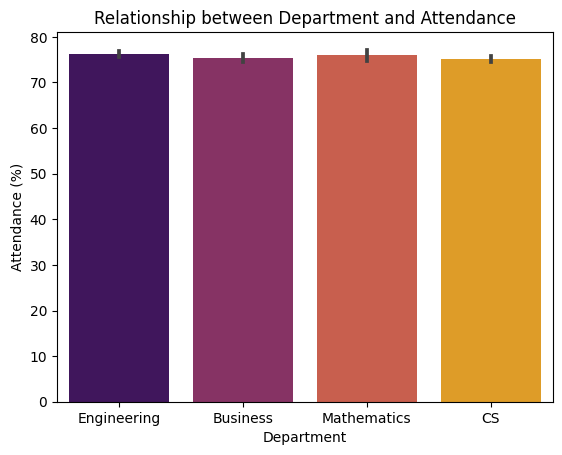

In [28]:
sns.barplot(data=df, x='Department', y='Attendance (%)', palette='inferno')
plt.title("Relationship between Department and Attendance")
plt.xlabel("Department")
plt.ylabel("Attendance (%)")
plt.show()

## Relation between Grade & ( department , study hours per week , extra activities , internet access )

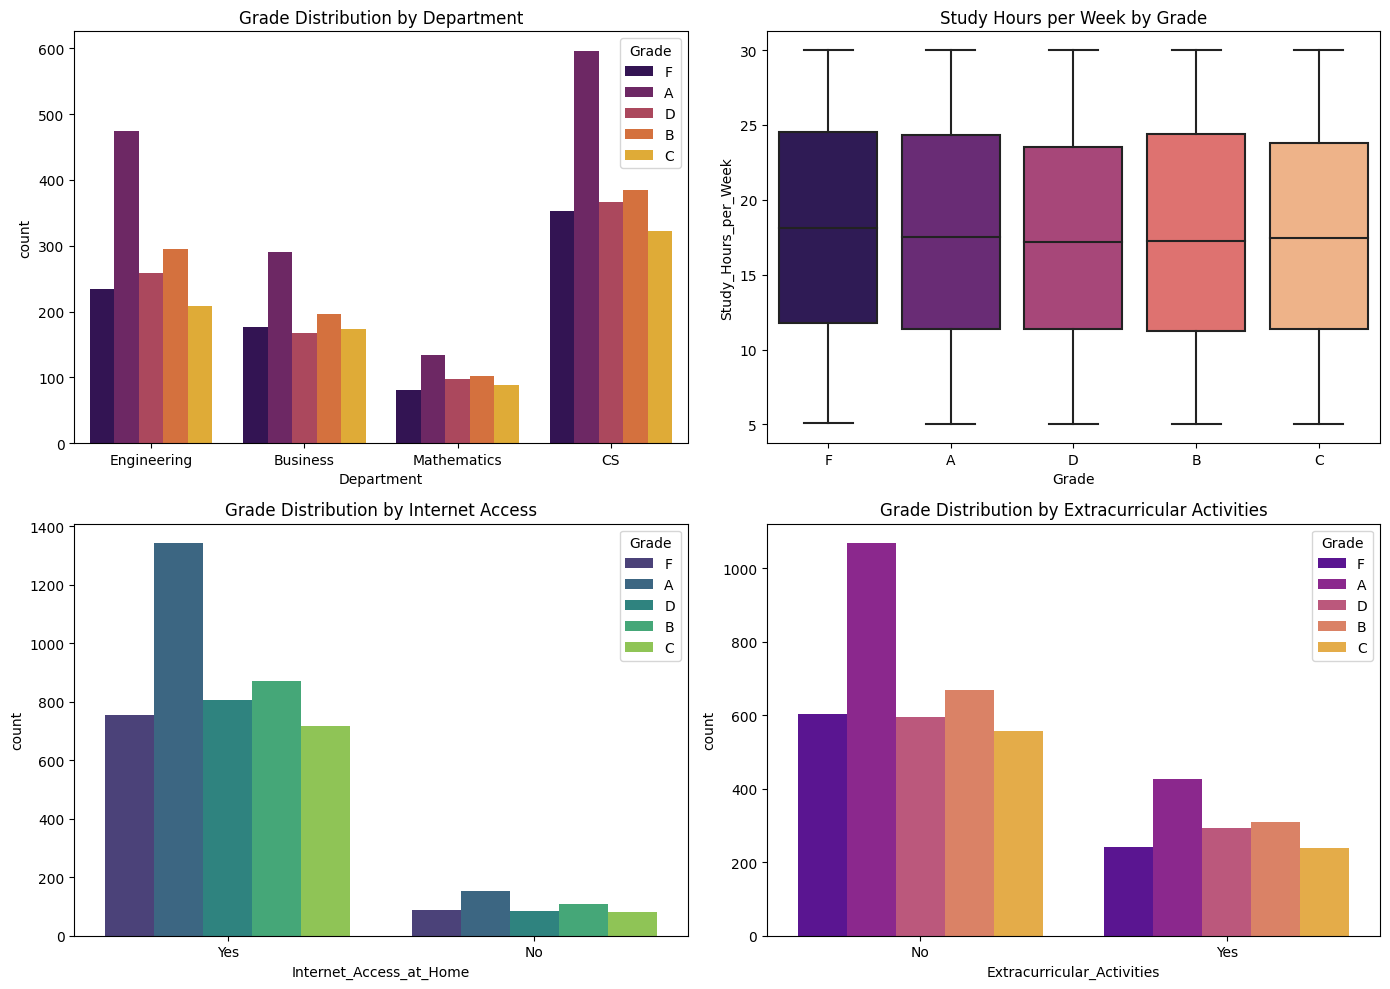

In [29]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Department', hue='Grade', palette='inferno')
plt.title("Grade Distribution by Department")


plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Grade', y='Study_Hours_per_Week', palette='magma')
plt.title("Study Hours per Week by Grade")


plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Internet_Access_at_Home', hue='Grade', palette='viridis')
plt.title("Grade Distribution by Internet Access")


plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Extracurricular_Activities', hue='Grade', palette='plasma')
plt.title("Grade Distribution by Extracurricular Activities")

plt.tight_layout()
plt.show()


## Relationship between Family Income Level and Parent Education Level

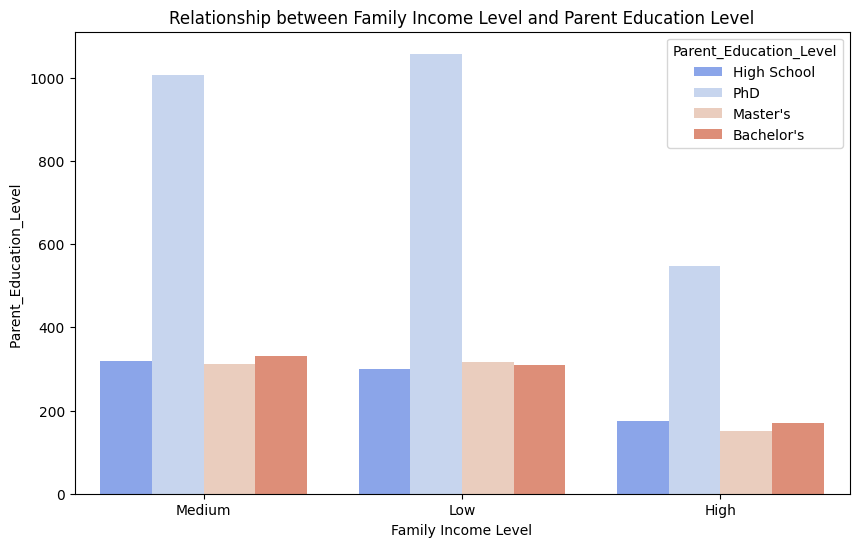

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Family_Income_Level', hue='Parent_Education_Level', palette='coolwarm')
plt.title("Relationship between Family Income Level and Parent Education Level")
plt.xlabel("Family Income Level")
plt.ylabel("Parent_Education_Level ")
plt.show()

## Relationship between Sleep Hours and Grade

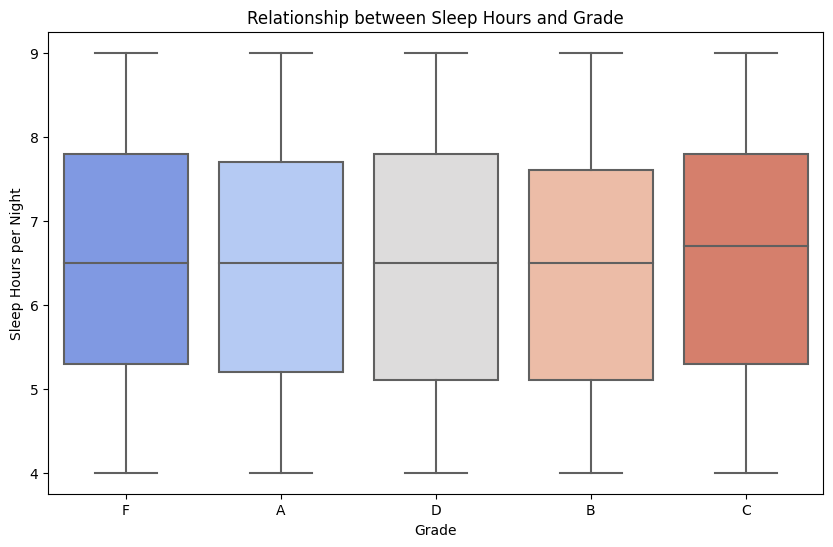

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Grade', y='Sleep_Hours_per_Night', palette='coolwarm')

plt.title("Relationship between Sleep Hours and Grade")
plt.xlabel("Grade")
plt.ylabel("Sleep Hours per Night")

plt.show()


## The relationship between Midterm_Score, Final_Score, and Total_Score

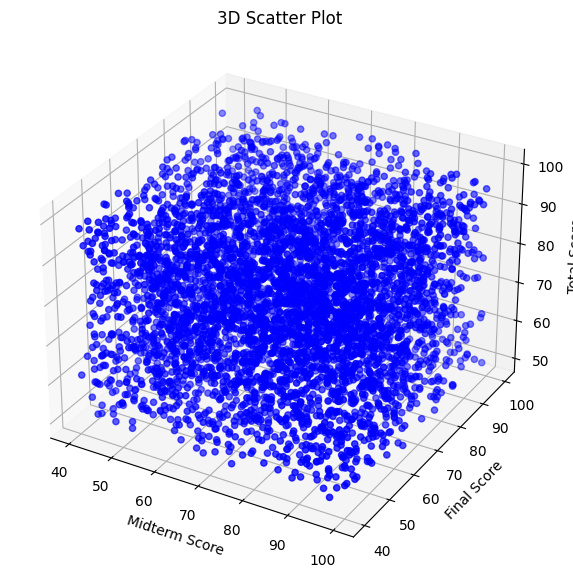

In [32]:
fig = plt.figure(figsize=(10, 7))  
ax = fig.add_subplot(111, projection='3d')  

ax.scatter(df['Midterm_Score'], df['Final_Score'], df['Total_Score'], c='blue', marker='o')  

ax.set_xlabel('Midterm Score')  
ax.set_ylabel('Final Score')  
ax.set_zlabel('Total Score')  

plt.title("3D Scatter Plot")  
plt.show()


## Relation between final score & midterm

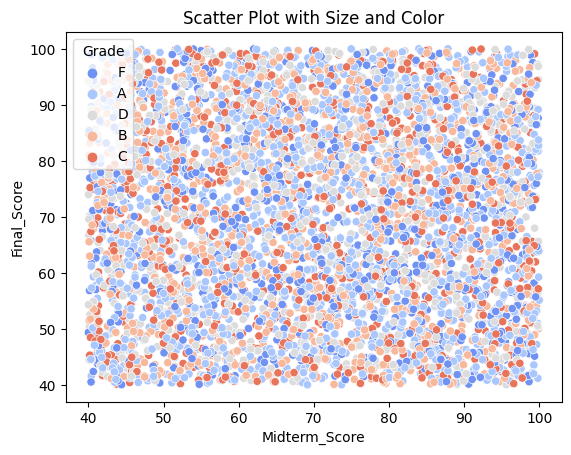

In [36]:
sns.scatterplot(data=df, x='Midterm_Score', y='Final_Score', hue='Grade', palette='coolwarm', sizes=(10, 20))  
plt.title("Relation between final score & midterm ")  
plt.show()

## Relationship Between Midterm & Final Scores with Study Hours and Stress

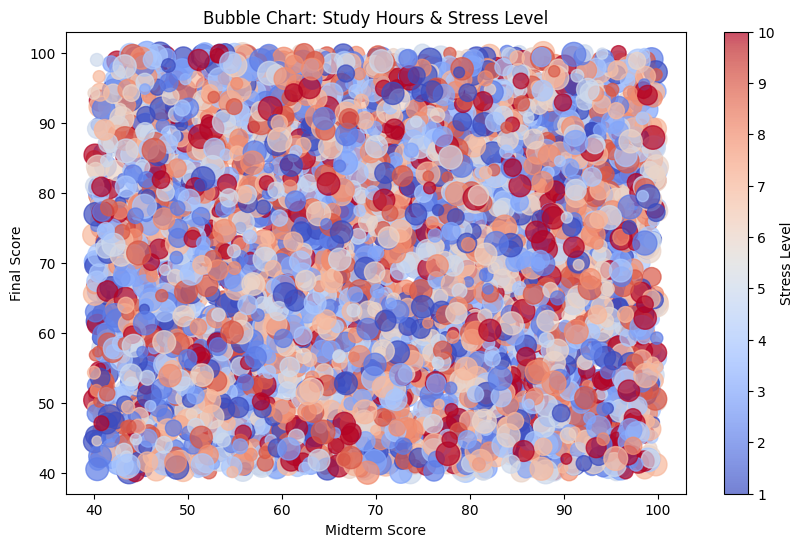

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Midterm_Score'], df['Final_Score'], s=df['Study_Hours_per_Week']*10, c=df['Stress_Level (1-10)'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Midterm Score')
plt.ylabel('Final Score')
plt.title('Bubble Chart: Study Hours & Stress Level')
plt.colorbar(label='Stress Level')
plt.show()

##  The relationship between income, parents’ education level, and grades

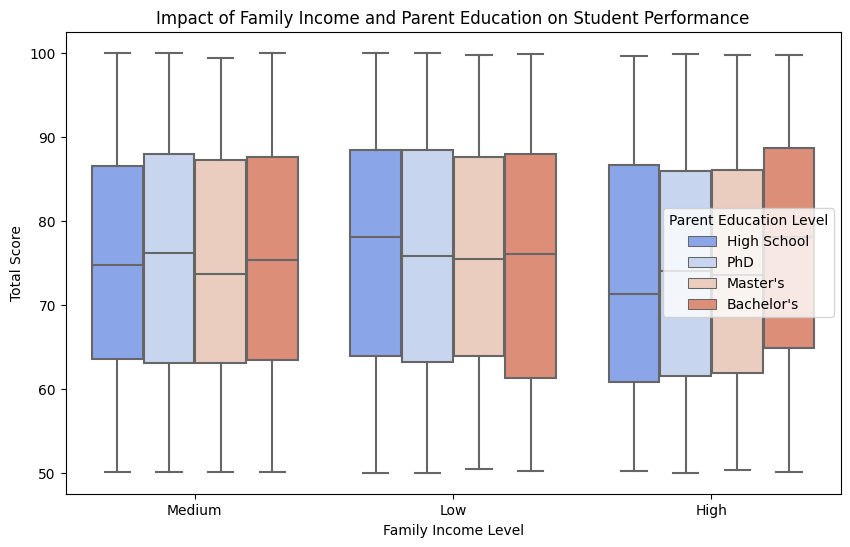

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Family_Income_Level'], y=df['Total_Score'], hue=df['Parent_Education_Level'], palette='coolwarm')
plt.xlabel('Family Income Level')
plt.ylabel('Total Score')
plt.title('Impact of Family Income and Parent Education on Student Performance')
plt.legend(title='Parent Education Level')
plt.show()


# Final Report

## This analysis aims to explore student performance based on various academic and personal factors.  The dataset includes multiple numerical and categorical variables such as attendance, midterm and final scores, study hours, stress levels, and extracurricular activities. Our objective is to identify trends, relationships, and potential insights that can help understand the factors affecting student succ

## Data Preprocessing

Handling Missing Values: Missing data was imputed using the KNN imputer for numerical variables and mode imputation for categorical variables.

Removing Duplicates: Checked and removed duplicate records to ensure data integrity.

Outlier Detection: Boxplots and violin plots were used to detect and visualize potential outliers.

## Exploratory Data Analysis (EDA)

A correlation heatmap was generated to identify strong relationships between numerical variables.

Distribution of Numeric Columns using histogram 

Distribution of Numeric Columns using violin plot

Distribution of Gender 

Distribution of Department

Distribution of Grades

## Correlation Analysis

Key Findings:

Study hours showed a positive correlation with total score.

Attendance percentage was strongly correlated with academic performance.

Stress level negatively impacted total score, indicating that higher stress may reduce academic achievement.

## Insights

Relation between Total score & ( Department , Gender ) USING boxplot 

Relation between Total score & ( Attendance , Study hours per week ) USING scatterplot 

Relationship between Department and Attendance USING barplot

Relation between Grade & ( department , study hours per week , extra activities , internet access )

Relationship between Family Income Level and Parent Education Level

Relationship between Sleep Hours and Grade

The relationship between Midterm_Score, Final_Score, and Total_Score

Relation between final score & midterm

Relationship Between Midterm & Final Scores with Study Hours and Stress

The relationship between income, parents’ education level, and grades


THAT SHOW :

Attendance Matters: Students with higher attendance percentages tend to achieve better scores.

Study Hours are Crucial: Students who dedicate more hours to studying generally perform better.

Extracurricular Activities & Internet Access: Their impact on grades was minimal, suggesting that students balance their activities well.

Sleep & Performance: Students with moderate sleep hours performed better than those with very low or very high sleep durations.

Parental Education & Income: Higher parental education levels were associated with better academic performance, potentially due to increased academic 

support at home.

# Conclusion

This analysis provides valuable insights into student performance, highlighting the importance of study habits, attendance, and stress management.

Educational institutions can use these findings to develop strategies that support students in optimizing their learning experience. Future studies could 

incorporate additional factors such as psychological well-being and teaching methods to gain a more comprehensive understanding.